In [1]:
import numpy as np
from metacoadd.simu import make_sim, run_metacodd, run_metadetect, get_shear, make_perfect_coadd

In [2]:
import matplotlib.pyplot as plt

# General parameters

In [3]:
# The center is linked to headers used for the test.
# Cannot be changed at the moment.
ra_center = 110.1844991         # Deg
dec_center = 52.8002126         # Deg
scale = 0.185768447408928       # Arcsec
cell_size = 1./60.              # Arcmin

noise = 1e-5

params_obj = {
    'hlr': 0.7,
    'flux': 100,
    'g1': 0.01,
    'g2': 0.,
}

params_single = {
    'psf_fwhm': 0.7,
    'psf_fwhm_std': 0.0,
    'psf_g1': 0.,
    'psf_g2': 0.,
    'noise': noise,
}

# Input headers

In [4]:
input_headers_dir = '../data/pre_selection_3/'

# Run Sim

In [5]:
explist, explist_psf, obj_dict = make_sim(input_headers_dir, ra_center, dec_center, scale, cell_size, params_obj, params_single, seed=1234)

# Run Metacoadd

In [6]:
simplecoadd, simplecoadd_psf = run_metacodd(explist, ra_center, dec_center, scale, cell_size, explist_psf=explist_psf)

# Run Metadetect

In [7]:
res = run_metadetect(simplecoadd, simplecoadd_psf, 1234)

In [8]:
final_res = get_shear(res, 'wmom')

# Make perfect coadd

In [9]:
perfect_coadd = make_perfect_coadd(obj_dict, ra_center, dec_center, scale, cell_size, params_single)

# Results

In [10]:
print('m: {}\nc: {}'.format((final_res['g1']/final_res['R11']-params_obj['g1'])[0], (final_res['g2']/final_res['R22'])[0]))

m: 1.9301788410901882e-06
c: 2.0183362953410988e-06


Text(0.5, 1.0, 'Perfect coadd')

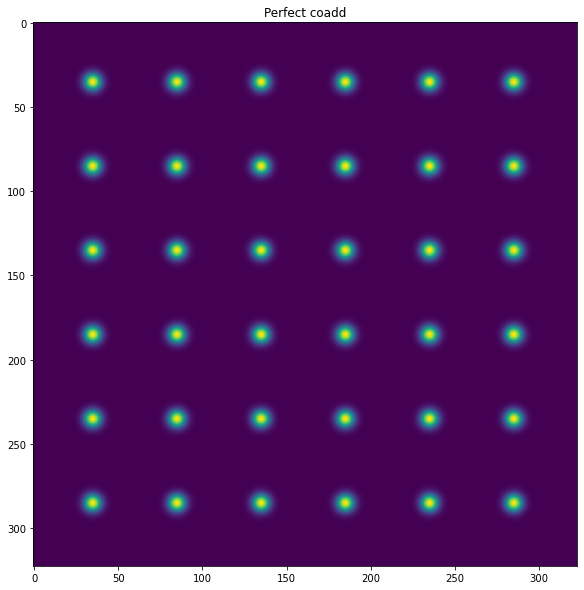

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(perfect_coadd)
plt.title("Perfect coadd")

Text(0.5, 1.0, 'simplecoadd')

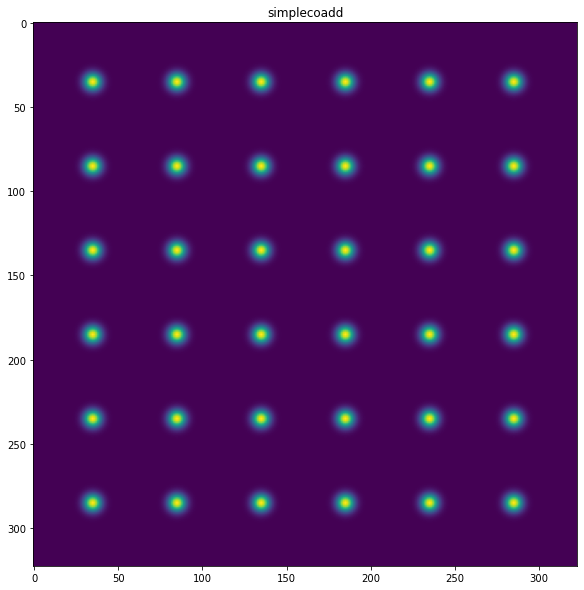

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(simplecoadd.coaddimage.image.array)
plt.title("simplecoadd")

MSE = 1.1311239027535458e-07 +/- 9.652834026287382e-07


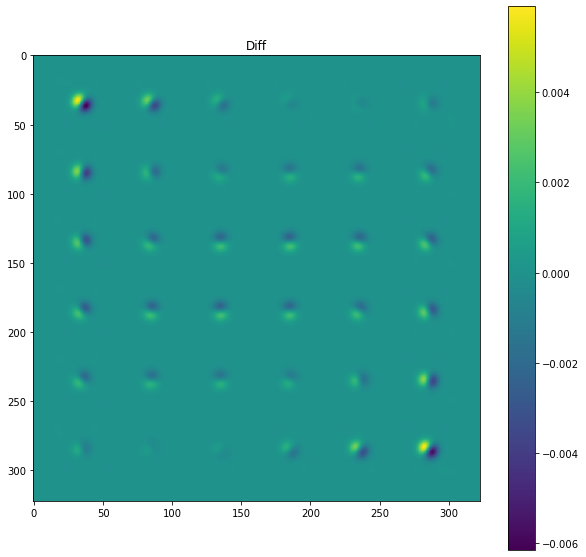

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(simplecoadd.coaddimage.image.array-perfect_coadd)
plt.colorbar()
plt.title("Diff")
err2 = (simplecoadd.coaddimage.image.array-perfect_coadd)**2.
print('MSE = {} +/- {}'.format(np.mean(err2), np.std(err2)))

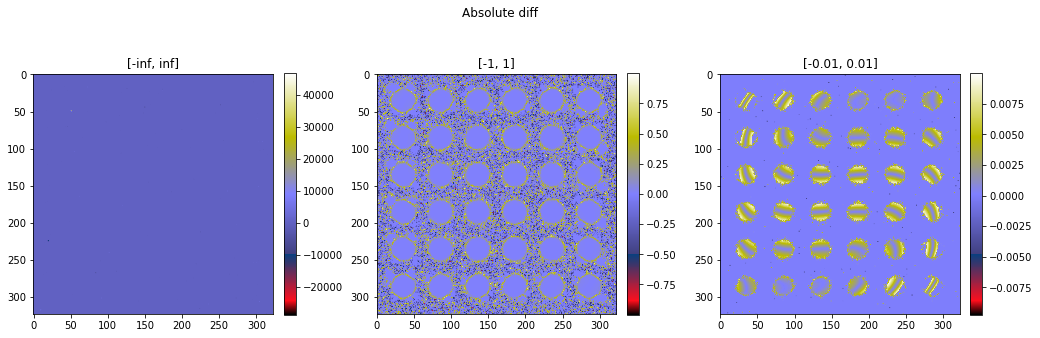

In [14]:
#plt.figure(figsize=(10,10))
abs_diff = np.abs(simplecoadd.coaddimage.image.array-perfect_coadd)/perfect_coadd
abs_diff[perfect_coadd == 0] = 0

fig, axs = plt.subplots(1, 3, figsize=(15,30))#, tight_layout=True)
fig.suptitle("Absolute diff", y=0.575)
fig.tight_layout(pad=5.0)
#fig.set.figheight(10)
#fig.set_figwidth(30)
fig_tmp = np.copy(abs_diff)
resi_val = np.inf
fig_tmp[(abs_diff > resi_val) | (abs_diff < -resi_val)] = 0
im = axs[0].imshow(fig_tmp, cmap='gist_stern')
fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title('[-{0}, {0}]'.format(resi_val))

fig_tmp = np.copy(abs_diff)
resi_val = 1
fig_tmp[(abs_diff > resi_val) | (abs_diff < -resi_val)] = 0
im = axs[1].imshow(fig_tmp, cmap='gist_stern')
fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_title('[-{0}, {0}]'.format(resi_val))

fig_tmp = np.copy(abs_diff)
resi_val = 1e-2
fig_tmp[(abs_diff > resi_val) | (abs_diff < -resi_val)] = 0
im = axs[2].imshow(fig_tmp, cmap='gist_stern')
fig.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)
axs[2].set_title('[-{0}, {0}]'.format(resi_val))

plt.show()